In [14]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('final_data.csv')
# data = data[:1000]
X = data.drop('popularity', axis=1)
y = data['popularity']

In [4]:
grid = {
    'objective': ['regression'],
    'min_split_gain': [0.01, 0.1, 0.25],
    'learning_rate': [0.1, 0.05, 0.025],
    'min_child_samples': [40, 50, 100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'n_estimators': [80, 100, 120],
    'feature_fraction': [0.7, 1.0],
    'metric': ['rmse'],
}
depth_leaves_pairs = [(5, 32), (7, 125), (8, 256), (9, 512)]


In [5]:
def grid_search_lgbm(X, y, grid):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
    best_mae = float('inf')

    keys = grid.keys()
    values = grid.values()

    for combo in itertools.product(*values):
        
        params = dict(zip(keys,combo))
        for max_depth, num_leaves in depth_leaves_pairs:
            params['max_depth'] = max_depth
            params['num_leaves'] = num_leaves
            model = LGBMRegressor(**params, verbose = -1)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_pred)

            if mae < best_mae:
                best_mae = mae
                best_params = params
    return best_params, best_mae


In [6]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
best_params, best_mae = grid_search_lgbm(X_train1, y_train1, grid)
print("Best MAE: ", best_mae)
print("Best Parameters: ", best_params)

Best MAE:  9.932438866511747
Best Parameters:  {'objective': 'regression', 'min_split_gain': 0.25, 'learning_rate': 0.05, 'min_child_samples': 50, 'subsample': 0.7, 'n_estimators': 120, 'feature_fraction': 1.0, 'metric': 'rmse', 'max_depth': 9, 'num_leaves': 512}


In [7]:
model = LGBMRegressor(**best_params)
model.fit(X_train1, y_train1)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE Score for LightGBM with best parameters: ", mae)
r2 = r2_score(y_test, y_pred)
print("R2 Score for LightGBM with best parameters: ", r2)


MAE Score for LightGBM with best parameters:  9.882598773421062
R2 Score for LightGBM with best parameters:  0.6045057616239795


In [12]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 9.882598773421062
RMSE: 14.934399266993086
R2: 0.6045057616239795


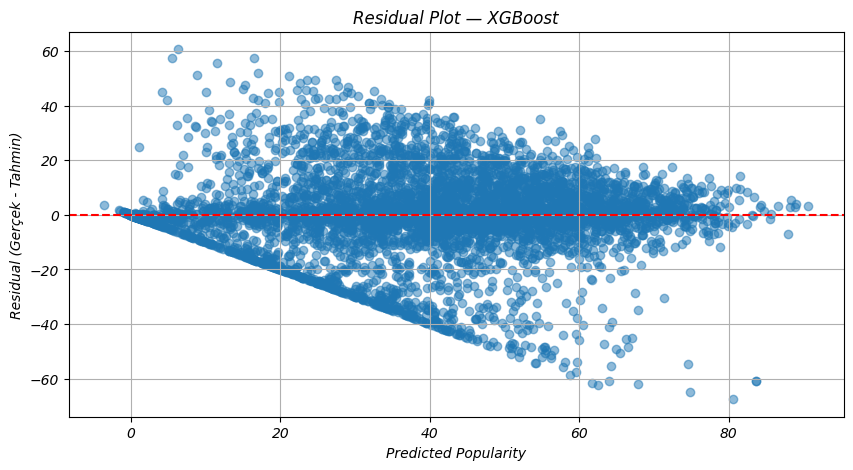

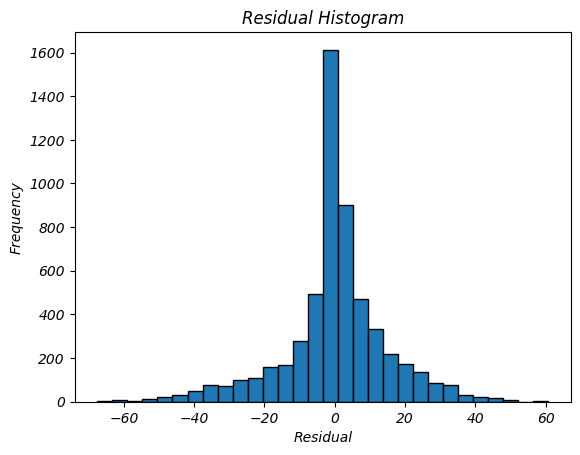

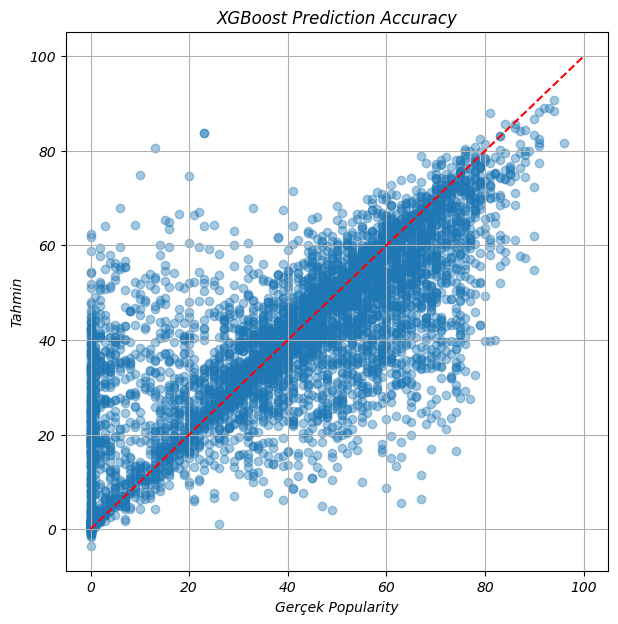

: 

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Popularity")
plt.ylabel("Residual (Gerçek - Tahmin)")
plt.title("Residual Plot — XGBoost")
plt.grid(True)
plt.show()

plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residual Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0,100], [0,100], 'r--')
plt.xlabel("Gerçek Popularity")
plt.ylabel("Tahmin")
plt.title("XGBoost Prediction Accuracy")
plt.grid(True)
plt.show()